# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

Your team wants to develop a dashboard to present daily visualizations of COVID-19 data collected from the [European Centre for Disease Prevention and Control.](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) Every day your team downloads the .xlsx file from the website, reads it, perform some transformations and produces several visualizations that are presented in the dashboard. 

Each row of the table contains the number of new cases and deaths reported per day and country. Every section below describes a specific task or visualization to perform.

# 1. Generate the file: covid a master cumulative table

The data table contains the daily counts. Here, we want to create the table that contains the daily cumulative counts for every country. This will be the main table we will use to generate the visualizations in the next steps. The steps in the first .ipynb file are as following:

## 1. Import packages Pandas, glob and os.

## 2. Read the Excel file using Pandas’ pd.read excel. Packages glob and os may help you automate the reading of the latest .xlsx file that you download in the same folder.

In [1]:
import pandas as pd
import glob
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx')
# covid

## 3. Rename some columns and replace some country names with shorter versions. Drop unnecessary columns. 

The snapshot below shows the pandas dataframe filtered (or sliced) by **’Country’ == ’Canada’.** We select all rows that have the value ’Canada’ in column ’Country’. 

Note the dimensions of the slice at the bottom and the indexes in bold font as the left column. As we mentioned earlier, the daily counts of the cases and deaths are not what we want. We want to generate and plot the cumulative counts for every country.

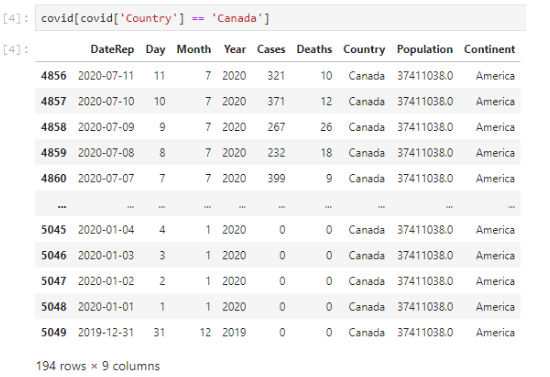

In [3]:
covid.rename(columns = {"dateRep": "DateRep", "day": "Day", "month": "Month", 
                        "year": "Year", "cases": "Cases", "deaths": "Deaths",
                        "countriesAndTerritories": "Country", "popData2019": "Population", "continentExp": "Continent"}, inplace = True)
covid.drop(columns = ['geoId', 'countryterritoryCode', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], inplace = True)
covid.replace(['United_States_of_America', 'United_Kingdom', 'South_Korea', 'Saudi_Arabia', 
               'South_Africa', 'United_Arab_Emirates', 'Dominican_Republic', 'CANADA'],
              ['USA', 'UK', 'S.Korea', 'S.Arabia', 'S.Africa', 'UAE', 'Dom.Rep.', 'Canada'], inplace = True)

# covid

covid[covid['Country'] == 'Canada']

,DateRep,Day,Month,Year,Cases,Deaths,Country,Population,Continent
6501,2020-08-27,27,8,2020,448,4,Canada,37411038.0,America
6502,2020-08-26,26,8,2020,322,7,Canada,37411038.0,America
6503,2020-08-25,25,8,2020,751,10,Canada,37411038.0,America
6504,2020-08-24,24,8,2020,267,2,Canada,37411038.0,America
6505,2020-08-23,23,8,2020,257,7,Canada,37411038.0,America
...,...,...,...,...,...,...,...,...,...
6737,2020-01-04,4,1,2020,0,0,Canada,37411038.0,America
6738,2020-01-03,3,1,2020,0,0,Canada,37411038.0,America
6739,2020-01-02,2,1,2020,0,0,Canada,37411038.0,America
6740,2020-01-01,1,1,2020,0,0,Canada,37411038.0,America


## 4. Generate the cumulative counts per day and country using *groupby(), sum()* and *cumsum().* Re-assign the indexes ’DateRep’ and ’Country’ as columns. Also, drop the cumulative sums of: ’Population’, ’Day’, ’Month’, ’Year’ as they are meaningless.

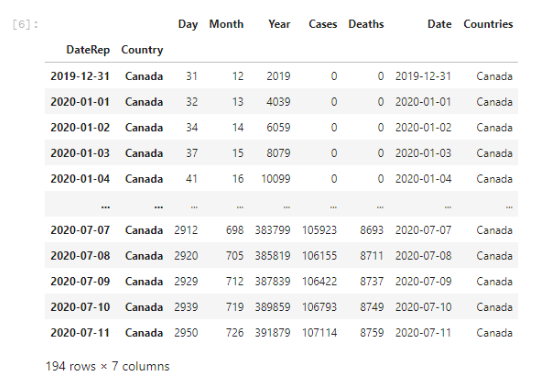

In [4]:
# Filter the dataframe using DateRep and Country and get the cumalative sum based on the Country
cumalative_covid = covid.groupby(['DateRep', 'Country']).sum().groupby('Country').cumsum()

# Create new columns and fill with the 1st level of MultiLevel Index and 2nd level respectively.
cumalative_covid['Date'] = cumalative_covid.index.get_level_values(0)
cumalative_covid['Countries'] = cumalative_covid.index.get_level_values(1)

# Dropping unneccesary and pointless Columns as these are just cumalatives of Days, Months, Year and Population.
cumalative_covid.drop(columns = ['Day', 'Month', 'Year', 'Population'], inplace = True)

# Filter by Country.
cumalative_covid[cumalative_covid['Countries'] == 'Canada']

,,Cases,Deaths,Date,Countries
DateRep,Country,,,,
2019-12-31,Canada,0,0,2019-12-31,Canada
2020-01-01,Canada,0,0,2020-01-01,Canada
2020-01-02,Canada,0,0,2020-01-02,Canada
2020-01-03,Canada,0,0,2020-01-03,Canada
2020-01-04,Canada,0,0,2020-01-04,Canada
...,...,...,...,...,...
2020-08-23,Canada,124629,9071,2020-08-23,Canada
2020-08-24,Canada,124896,9073,2020-08-24,Canada
2020-08-25,Canada,125647,9083,2020-08-25,Canada


## 5. Join (or merge) with the original table to obtain the population data for every row.

In [5]:
#  Join using original table by inner join and selected columns on right df, keeping the left index as is, and joining on DateRep and Country.
cumalative_covid = cumalative_covid.merge(covid[['DateRep', 'Country', 'Population', 'Continent']], 
                                          how='inner', left_index=True,
#                                           left_on=['DateRep', 'Country'],
                                          right_on=['DateRep', 'Country'])

cumalative_covid

,Cases,Deaths,Date,Countries,DateRep,Country,Population,Continent
230,0,0,2019-12-31,Afghanistan,2019-12-31,Afghanistan,38041757.0,Asia
638,0,0,2019-12-31,Algeria,2019-12-31,Algeria,43053054.0,Africa
1685,0,0,2019-12-31,Armenia,2019-12-31,Armenia,2957728.0,Europe
2084,0,0,2019-12-31,Australia,2019-12-31,Australia,25203200.0,Oceania
2325,0,0,2019-12-31,Austria,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...,...,...
38088,1034,30,2020-08-27,Vietnam,2020-08-27,Vietnam,96462108.0,Asia
38325,766,1,2020-08-27,Western_Sahara,2020-08-27,Western_Sahara,582458.0,Africa
38449,1930,560,2020-08-27,Yemen,2020-08-27,Yemen,29161922.0,Asia
38589,11376,282,2020-08-27,Zambia,2020-08-27,Zambia,17861034.0,Africa


## 6. Reset the index, drop irrelevant columns and save the final table with the name: 

## *'covid a master cumulative table.xlsx'.*

In [6]:
# Reset the index and drop unrequired columns
cumalative_covid = cumalative_covid.reset_index().drop(columns = ['index', 'DateRep', 'Countries'])

# Extract df to excel file
cumalative_covid.to_excel('Covid_A_Master_Cumalative_Table.xlsx')